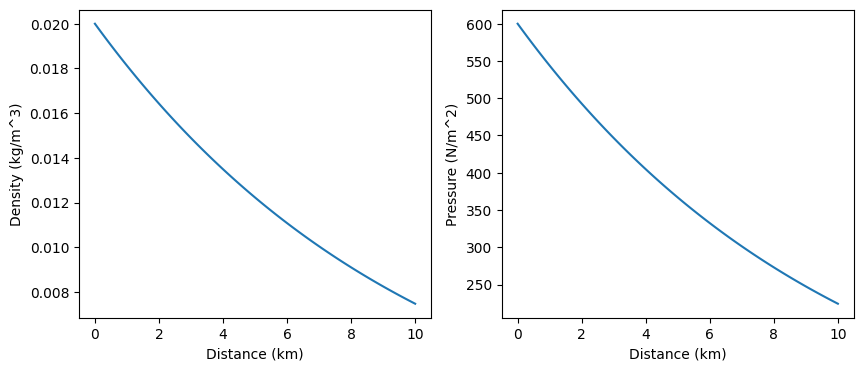

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given values and constants
# Gravitational Constant
G = 6.67*10**(-11)
# Boltzmann Constant
Kb = 1.380649*10**(-23)
# Distance from the surface: z = 10km 
z_s = np.linspace(0,10,100)
# Radius of the Earth: R0 = 3.38*10**8cm = 3.38*10**6m
R0 = 3.38*10**6
# Mass of the Planet: M = 6.42*10**23kg
M = 6.42*10**23
# Density of atmosphere near the surface: rho0 = 0.02kg
rho0 = 0.02
# Pressure near the surface: P0 = 6milibars = 600N/m^2
P0 = 600
# Average temperature of the mars surface: T = 200K
T = 200
# Accleration due to gravity: g
# Assume to be constant since the height is small compared to the radius
g = (G*M)/(R0**2)
# Mean molecular weight: mu = 43.34
mu = 43.34
# Mass of Hydrogen: mH = 1.673 x 10^-27 kg
mH = 1.673*10**(-27)

fig, axes = plt.subplots(1,2,figsize=(10,4))

# Calculating and Plotting the variations in Density (rho)
rho = []
for z in z_s:
    rho.append(rho0*np.exp((-g*z*mu*mH*10**3)/(Kb*T)))
axes[0].plot(z_s, rho)
axes[0].set_xlabel("Distance (km)")
axes[0].set_ylabel("Density (kg/m^3)")

# Calculating and Plotting the variation in Pressure (P)
P = []
for z in z_s:
    P.append(P0*np.exp((-g*z*mu*mH*10**3)/(Kb*T)))
axes[1].plot(z_s,P)
axes[1].set_xlabel("Distance (km)")
axes[1].set_ylabel("Pressure (N/m^2)");

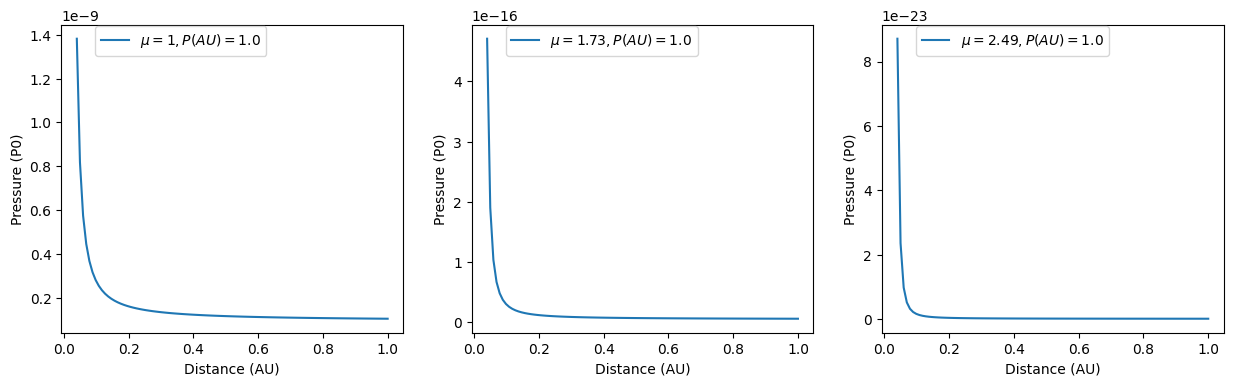

In [2]:
import numpy as np
import matplotlib.pyplot as plt

P0 = 1 # Since we will be comparing the variation in pressure with respect to the P0
G = 6.67*10**(-11)
M = 1.989*10**30
mu = [1, 1.73, 2.49]
mH = 1.673*10**(-27)
Kb = 1.380649*10**(-23)
T0 = 10**6
r0 =  6.9634*10**8
AU = 1.496*10**11 
def pressure(r,mu):
    constant = (G*M*mH*mu)/(T0*Kb)
    return P0*np.exp(constant*((1/r)-(1/r0))), P0*np.exp(constant*((1/r0)-(1/r0)))

fig, axes = plt.subplots(1,3,figsize=(15,4))


for i in [0,1,2]:
    p=[]
    r_s = np.linspace(0.04,1,100)
    for r in r_s:
        p.append(pressure(r*AU, mu=mu[i])[0])
    axes[i].plot(r_s,p, label=f"$\mu={mu[i]},P(AU)={pressure(r*AU, mu=mu[i])[1]}$")
    axes[i].set_xlabel("Distance (AU)")
    axes[i].set_ylabel("Pressure (P0)")
    axes[i].legend(loc=(0.1,0.9))

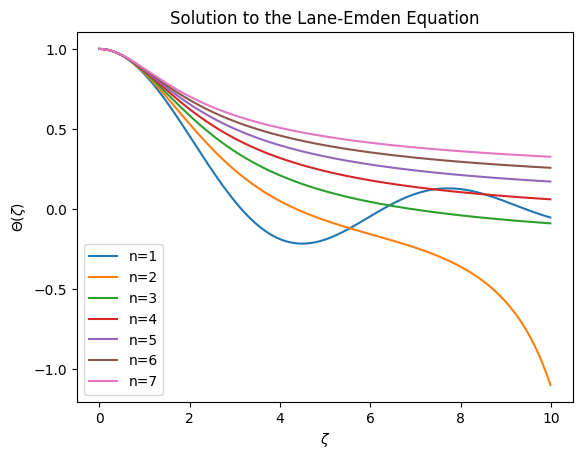

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# We will consider the radial distance as x
# Defining Lane-Emden equation as a first-order system of ODEs
def lane_emden(y, x, n):
    theta, dtheta_dx = y
    return [dtheta_dx, -2/x * dtheta_dx - theta**n]

# Define the range of n values (from 0 to a maximum value)
n_values = np.arange(1,8) 

# Define the range of x values
x_start = 1e-6
x_end = 10.0
step_size = 0.01
x_values = np.arange(x_start, x_end, step_size)

# Creating a plot for each value of n
for n in n_values:
    # Define the initial conditions at x = 0
    theta0 = 1.0
    dtheta_dx0 = 0.0
    y = [theta0, dtheta_dx0]

    # Create an array to store the values of theta
    theta_values = []

    # Numerical integration using 4th-order Runge-Kutta
    for x in x_values:
        theta_values.append(y[0])
        k1 = np.multiply(step_size, lane_emden(y, x, n))
        k2 = np.multiply(step_size, lane_emden(np.add(y, np.divide(k1, 2)), x + step_size / 2, n))
        k3 = np.multiply(step_size, lane_emden(np.add(y, np.divide(k2, 2)), x + step_size / 2, n))
        k4 = np.multiply(step_size, lane_emden(np.add(y, k3), x + step_size, n))
        y = np.add(y, np.divide(np.add(np.add(k1, np.multiply(2, k2)), np.add(np.multiply(2, k3), k4)), 6))

    # Plot the solution for the current value of n
    plt.plot(x_values, theta_values)
    plt.xlabel(f'$\zeta$')
    plt.ylabel(f'$\Theta(\zeta)$')
    plt.title(f'Solution to the Lane-Emden Equation')
plt.legend(['n=1','n=2','n=3','n=4','n=5','n=6','n=7']);
# This plots represent the relation between radial distance and density parameters

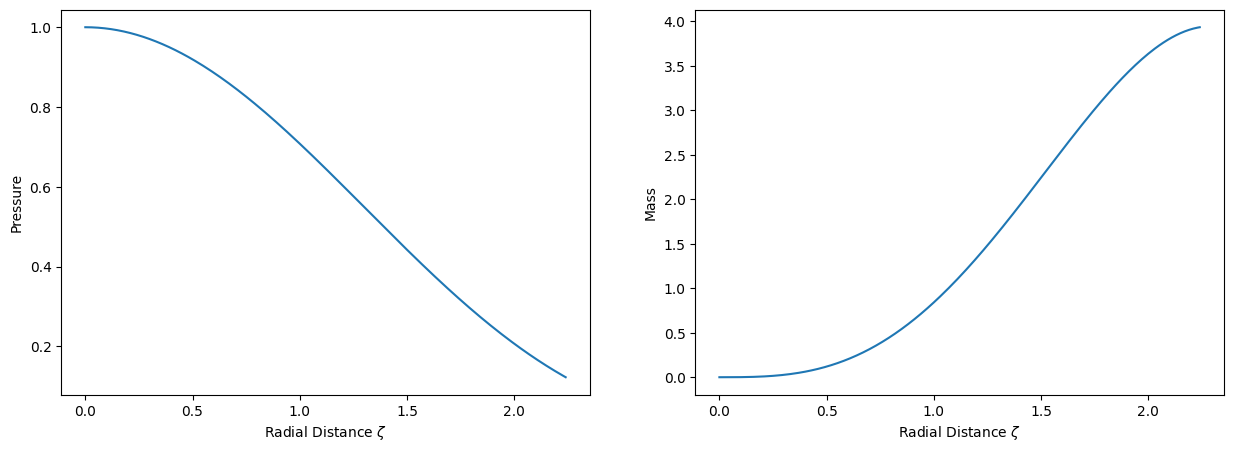

In [4]:
# Treating the other constants as unity
xi_values = np.arange(1e-6, 2.25, 0.01)
fig, axes = plt.subplots(1,2,figsize=(15,5))
P = (np.sin(xi_values)/xi_values)**2
axes[0].plot(xi_values, P)
axes[0].set_xlabel(f"Radial Distance $\zeta$")
axes[0].set_ylabel("Pressure")
M = np.sin(xi_values)*(xi_values**2)
axes[1].plot(xi_values,M)
axes[1].set_xlabel(f"Radial Distance $\zeta$")
axes[1].set_ylabel("Mass");